# 实验任务二：使用CNN来进行图像分类
## CIFAR-10 数据集
本次实验使用CIFAR-10 数据集来进行实验。
CIFAR-10 数据集包含 60,000 张 32×32 像素的彩色图像，
分为 10 个类别，每个类别有 6,000 张图像。
具体类别包括飞机、汽车、鸟、猫、鹿、狗、青蛙、马、船和卡车。
数据集被分为训练集和测试集，
其中训练集包含 50,000 张图像，测试集包含 10,000 张图像。
## 1. 在CIFAR数据集上实现CNN
本次任务要求补全代码中空缺部分，包括实现一个CNN类，以及训练过程代码

数据集下载链接：

https://box.nju.edu.cn/f/d59d5d910d754c3091f5/

In [1]:
import torchvision.transforms as transforms
from torchvision import datasets
import torchvision
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

导入CIFAR-10数据集：

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 下载并加载训练集
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# 创建数据加载器
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=32,
    shuffle=True
)
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=32,
    shuffle=False
)

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


定义CNN网络：

In [6]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        #TODO: 实现模型结构
        #TODO 实现self.conv1:卷积层
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        #TODO 实现self.conv2:卷积层
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        #TODO 实现self.pool: MaxPool2d
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        #TODO 实现self.fc1: 线性层
        self.fc1 = nn.Linear(64 * 8 * 8, 128) 
        #TODO 实现self.fc2：线性层
        self.fc2 = nn.Linear(128, 10)
        #TODO 实现 self.dropout: Dropout层
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

进行训练：

In [ ]:
def train(model, train_loader, test_loader, device):
    num_epochs = 15
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            #TODO:实现训练部分，完成反向传播过程
            #TODO: optimizer梯度清除
            optimizer.zero_grad()
            #TODO: 模型输入
            outputs = model(inputs)
            #TODO: 计算损失
            loss = criterion(outputs, labels)
            #TODO: 反向传播
            loss.backward()
            #TODO: 更新参数
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:  # 每100个batch打印一次损失
                print(
                    f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
                running_loss = 0.0

        # 每个epoch结束后在测试集上评估模型
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f'Test Accuracy: {100 * correct / total:.2f}%')

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#创建模型
model = SimpleCNN().to(device)
train(model, trainloader, testloader, device)

Epoch [1/15], Step [100/1563], Loss: 2.1076
Epoch [1/15], Step [200/1563], Loss: 1.8159
Epoch [1/15], Step [300/1563], Loss: 1.6787
Epoch [1/15], Step [400/1563], Loss: 1.5969
Epoch [1/15], Step [500/1563], Loss: 1.5564
Epoch [1/15], Step [600/1563], Loss: 1.5274
Epoch [1/15], Step [700/1563], Loss: 1.4809
Epoch [1/15], Step [800/1563], Loss: 1.4616
Epoch [1/15], Step [900/1563], Loss: 1.4611
Epoch [1/15], Step [1000/1563], Loss: 1.3980
Epoch [1/15], Step [1100/1563], Loss: 1.3840
Epoch [1/15], Step [1200/1563], Loss: 1.3715
Epoch [1/15], Step [1300/1563], Loss: 1.3808
Epoch [1/15], Step [1400/1563], Loss: 1.3397
Epoch [1/15], Step [1500/1563], Loss: 1.3598
Test Accuracy: 58.93%
Epoch [2/15], Step [100/1563], Loss: 1.2549
Epoch [2/15], Step [200/1563], Loss: 1.2481
Epoch [2/15], Step [300/1563], Loss: 1.2726
Epoch [2/15], Step [400/1563], Loss: 1.2315
Epoch [2/15], Step [500/1563], Loss: 1.2538
Epoch [2/15], Step [600/1563], Loss: 1.2251
Epoch [2/15], Step [700/1563], Loss: 1.1786
Epoc

In [11]:
def denormalize(tensor):
    # 输入是归一化后的张量 [C, H, W]
    # 反归一化：(tensor * std) + mean
    # 原始归一化参数：mean=0.5, std=0.5
    return tensor * 0.5 + 0.5

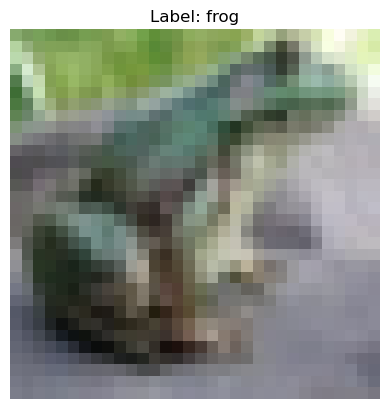

In [12]:
data_iter = iter(trainloader)
images, labels = next(data_iter)  # 获取第一个batch

# 反归一化并转换为numpy
img = denormalize(images[0]).numpy()  # 取batch中的第一张
img = np.transpose(img, (1, 2, 0))    # 从(C, H, W)转为(H, W, C)

# 显示图像
plt.imshow(img)
plt.title(f"Label: {trainset.classes[labels[0]]}")
plt.axis('off')
plt.show()

## 2. 在MNIST数据集上实现CNN：
在实验二中我们实现了在MNIST数据集上进行分类，使用本节的CNN又该如何实现，结合本节内容以及实验二内容尝试实现

In [22]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)  # MNIST只有1个通道
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # MNIST 图像大小从 28x28 缩小到 7x7
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 训练函数（与 CIFAR-10 训练过程相同）
def train(model, train_loader, test_loader, device):
    num_epochs = 5 # 前几步就有很高准确率故下调 
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            if i % 100 == 99:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
                running_loss = 0.0

        # 每个epoch结束后在测试集上评估模型
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f'Test Accuracy: {100 * correct / total:.2f}%')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MNIST_CNN().to(device)
train(model, trainloader, testloader, device)


Epoch [1/5], Step [100/938], Loss: 1.0461
Epoch [1/5], Step [200/938], Loss: 0.3657
Epoch [1/5], Step [300/938], Loss: 0.2589
Epoch [1/5], Step [400/938], Loss: 0.2030
Epoch [1/5], Step [500/938], Loss: 0.1918
Epoch [1/5], Step [600/938], Loss: 0.1547
Epoch [1/5], Step [700/938], Loss: 0.1795
Epoch [1/5], Step [800/938], Loss: 0.1313
Epoch [1/5], Step [900/938], Loss: 0.1271
Test Accuracy: 97.93%
Epoch [2/5], Step [100/938], Loss: 0.1255
Epoch [2/5], Step [200/938], Loss: 0.1036
Epoch [2/5], Step [300/938], Loss: 0.0963
Epoch [2/5], Step [400/938], Loss: 0.1209
Epoch [2/5], Step [500/938], Loss: 0.0954
Epoch [2/5], Step [600/938], Loss: 0.1062
Epoch [2/5], Step [700/938], Loss: 0.1009
Epoch [2/5], Step [800/938], Loss: 0.0933
Epoch [2/5], Step [900/938], Loss: 0.1007
Test Accuracy: 98.87%
Epoch [3/5], Step [100/938], Loss: 0.0931
Epoch [3/5], Step [200/938], Loss: 0.0838
Epoch [3/5], Step [300/938], Loss: 0.0839
Epoch [3/5], Step [400/938], Loss: 0.0812
Epoch [3/5], Step [500/938], Los

## 3. 卷积神经网络（LeNet）
本节将介绍LeNet，它是最早发布的卷积神经网络之一，
因其在计算机视觉任务中的高效性能而受到广泛关注。 
这个模型是由AT&T贝尔实验室的研究员Yann LeCun在1989年提出的（并以其命名），
目的是识别图像 (LeCun et al., 1998)中的手写数字。 
当时，Yann LeCun发表了第一篇通过反向传播成功训练卷积神经网络的研究，
这项工作代表了十多年来神经网络研究开发的成果。

我们对原始模型做了一点小改动，去掉了最后一层的高斯激活。除此之外，这个网络与最初的LeNet-5一致。

以下是通过实例化一个Sequential来实现LeNet代码.

In [13]:
import torch
from torch import nn

net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10))

下面，我们将一个大小为28x28 的单通道（黑白）图像通过LeNet。
通过在每一层打印输出的形状，我们可以检查模型，以确保其操作与我们期望的图中一致

In [14]:
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


TODO：结合图片中所给出的LeNet以及给出的nn.Sequential，将前文给出的net结构以类的方式实现，并实现在
MNIST数据集上的分类

In [23]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)  # 输入 1 通道，输出 6 通道
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # 输入 6 通道，输出 16 通道
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)  # 平均池化层
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 16 个 5x5 特征图展平后连接到 120 维
        self.fc2 = nn.Linear(120, 84)  # 120 -> 84
        self.fc3 = nn.Linear(84, 10)  # 84 -> 10 (分类数)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))  # 卷积 + 激活 + 池化
        x = self.pool(F.sigmoid(self.conv2(x)))  # 卷积 + 激活 + 池化
        x = x.view(-1, 16 * 5 * 5)  # 展平
        x = F.sigmoid(self.fc1(x))  # 全连接 + 激活
        x = F.sigmoid(self.fc2(x))  # 全连接 + 激活
        x = self.fc3(x)  # 最后全连接
        return x

# 训练函数
def train(model, train_loader, test_loader, device):
    num_epochs = 10  # 训练 10 轮
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            if i % 100 == 99:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
                running_loss = 0.0

        # 测试集评估
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f'Test Accuracy: {100 * correct / total:.2f}%')

# 运行 LeNet 训练 MNIST
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet().to(device)
train(model, trainloader, testloader, device)


Epoch [1/10], Step [100/938], Loss: 2.3097
Epoch [1/10], Step [200/938], Loss: 2.3040
Epoch [1/10], Step [300/938], Loss: 1.9860
Epoch [1/10], Step [400/938], Loss: 1.1272
Epoch [1/10], Step [500/938], Loss: 0.7229
Epoch [1/10], Step [600/938], Loss: 0.5403
Epoch [1/10], Step [700/938], Loss: 0.4633
Epoch [1/10], Step [800/938], Loss: 0.3845
Epoch [1/10], Step [900/938], Loss: 0.3482
Test Accuracy: 90.64%
Epoch [2/10], Step [100/938], Loss: 0.3093
Epoch [2/10], Step [200/938], Loss: 0.2787
Epoch [2/10], Step [300/938], Loss: 0.2681
Epoch [2/10], Step [400/938], Loss: 0.2462
Epoch [2/10], Step [500/938], Loss: 0.2240
Epoch [2/10], Step [600/938], Loss: 0.2244
Epoch [2/10], Step [700/938], Loss: 0.2169
Epoch [2/10], Step [800/938], Loss: 0.2098
Epoch [2/10], Step [900/938], Loss: 0.1888
Test Accuracy: 94.58%
Epoch [3/10], Step [100/938], Loss: 0.1978
Epoch [3/10], Step [200/938], Loss: 0.1807
Epoch [3/10], Step [300/938], Loss: 0.1653
Epoch [3/10], Step [400/938], Loss: 0.1614
Epoch [3/1

## 4. 批量规范化
训练深层神经网络是十分困难的，特别是在较短的时间内使他们收敛更加棘手。 
本节将介绍批量规范化（batch normalization） (Ioffe and Szegedy, 2015)，
这是一种流行且有效的技术，可持续加速深层网络的收敛速度。

为什么需要批量规范化层呢？让我们来回顾一下训练神经网络时出现的一些实际挑战。

首先，数据预处理的方式通常会对最终结果产生巨大影响。  
使用真实数据时，我们的第一步是标准化输入特征，使其平均值为0，方差为1。 
直观地说，这种标准化可以很好地与我们的优化器配合使用，因为它可以将参数的量级进行统一。

第二，对于典型的多层感知机或卷积神经网络。当我们训练时，中间层中的变量（
例如，多层感知机中的仿射变换输出）
可能具有更广的变化范围：不论是沿着从输入到输出的层，跨同一层中的单元，
或是随着时间的推移，模型参数的随着训练更新变幻莫测。 批量规范化的发明者非正式地假设，
这些变量分布中的这种偏移可能会阻碍网络的收敛。 
直观地说，我们可能会猜想，如果一个层的可变值是另一层的100倍，这可能需要对学习率进行补偿调整。

第三，更深层的网络很复杂，容易过拟合。 这意味着正则化变得更加重要。

批量规范化应用于单个可选层（也可以应用到所有层），其原理如下：在每次训练迭代中，
我们首先规范化输入，即通过减去其均值并除以其标准差，其中两者均基于当前小批量处理。 
接下来，我们应用比例系数和比例偏移。 正是由于这个基于批量统计的标准化，才有了批量规范化的名称。

请注意，如果我们尝试使用大小为1的小批量应用批量规范化，我们将无法学到任何东西。 
这是因为在减去均值之后，每个隐藏单元将为0。 所以，
只有使用足够大的小批量，批量规范化这种方法才是有效且稳定的。 
请注意，在应用批量规范化时，批量大小的选择可能比没有批量规范化时更重要。

### 从零实现


In [16]:
import torch
from torch import nn
# from d2l import torch as d2l


def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # 通过is_grad_enabled来判断当前模式是训练模式还是预测模式
    if not torch.is_grad_enabled():
        # 如果是在预测模式下，直接使用传入的移动平均所得的均值和方差
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # 使用全连接层的情况，计算特征维上的均值和方差
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # 使用二维卷积层的情况，计算通道维上（axis=1）的均值和方差。
            # 这里我们需要保持X的形状以便后面可以做广播运算
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # 训练模式下，用当前的均值和方差做标准化
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # 更新移动平均的均值和方差
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta  # 缩放和移位
    return Y, moving_mean.data, moving_var.data

In [17]:
class BatchNorm(nn.Module):
    # num_features：完全连接层的输出数量或卷积层的输出通道数。
    # num_dims：2表示完全连接层，4表示卷积层
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # 参与求梯度和迭代的拉伸和偏移参数，分别初始化成1和0
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # 非模型参数的变量初始化为0和1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # 如果X不在内存上，将moving_mean和moving_var
        # 复制到X所在显存上
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # 保存更新过的moving_mean和moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.9)
        return Y

为了更好理解如何应用BatchNorm，下面我们将其应用于LeNet模型 
回想一下，批量规范化是在卷积层或全连接层之后、相应的激活函数之前应用的.

In [18]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), BatchNorm(6, num_dims=4), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), BatchNorm(16, num_dims=4), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(16*4*4, 120), BatchNorm(120, num_dims=2), nn.Sigmoid(),
    nn.Linear(120, 84), BatchNorm(84, num_dims=2), nn.Sigmoid(),
    nn.Linear(84, 10))

### 简单实现
除了使用我们刚刚定义的BatchNorm，我们也可以直接使用深度学习框架中定义的BatchNorm。
该代码看起来几乎与我们上面的代码相同。

In [19]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), nn.BatchNorm2d(6), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.BatchNorm2d(16), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(256, 120), nn.BatchNorm1d(120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.BatchNorm1d(84), nn.Sigmoid(),
    nn.Linear(84, 10))

练习：使用上述定义的包含BatchNorm的LeNet网络，
实现在MNIST数据集上的图像分类(直接使用nn.Sequential或者自定义类均可)

In [ ]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

class LeNetBN(nn.Module):
    def __init__(self):
        super(LeNetBN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.bn1 = nn.BatchNorm2d(6)  # 批量规范化
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(16)  # 批量规范化
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.bn3 = nn.BatchNorm1d(120)  # 批量规范化
        self.fc2 = nn.Linear(120, 84)
        self.bn4 = nn.BatchNorm1d(84)  # 批量规范化
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.bn1(self.conv1(x))))  # 卷积 + BN + 激活 + 池化
        x = self.pool(F.sigmoid(self.bn2(self.conv2(x))))  # 卷积 + BN + 激活 + 池化
        x = x.view(-1, 16 * 4 * 4)  # 展平
        x = F.sigmoid(self.bn3(self.fc1(x)))  # 全连接 + BN + 激活
        x = F.sigmoid(self.bn4(self.fc2(x)))  # 全连接 + BN + 激活
        x = self.fc3(x)  # 最后全连接
        return x

def train(model, train_loader, test_loader, device):
    num_epochs = 10  # 训练 10 轮
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            if i % 100 == 99:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
                running_loss = 0.0

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f'Test Accuracy: {100 * correct / total:.2f}%')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNetBN().to(device)
train(model, trainloader, testloader, device)


Epoch [1/10], Step [100/938], Loss: 1.4757
Epoch [1/10], Step [200/938], Loss: 0.8621
Epoch [1/10], Step [300/938], Loss: 0.5031
Epoch [1/10], Step [400/938], Loss: 0.3430
Epoch [1/10], Step [500/938], Loss: 0.2613
Epoch [1/10], Step [600/938], Loss: 0.2004
Epoch [1/10], Step [700/938], Loss: 0.1795
Epoch [1/10], Step [800/938], Loss: 0.1453
Epoch [1/10], Step [900/938], Loss: 0.1435
Test Accuracy: 92.77%
Epoch [2/10], Step [100/938], Loss: 0.1270
Epoch [2/10], Step [200/938], Loss: 0.1063
Epoch [2/10], Step [300/938], Loss: 0.1093
Epoch [2/10], Step [400/938], Loss: 0.1013
Epoch [2/10], Step [500/938], Loss: 0.0872
Epoch [2/10], Step [600/938], Loss: 0.0973
Epoch [2/10], Step [700/938], Loss: 0.0942
Epoch [2/10], Step [800/938], Loss: 0.0840
Epoch [2/10], Step [900/938], Loss: 0.0818
Test Accuracy: 86.08%
Epoch [3/10], Step [100/938], Loss: 0.0731
Epoch [3/10], Step [200/938], Loss: 0.0740
Epoch [3/10], Step [300/938], Loss: 0.0657
Epoch [3/10], Step [400/938], Loss: 0.0660
Epoch [3/1